In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inference import Inference

In [2]:
def middleCrop(image_path, percentage):
    """
    Crops the middle of an image.

    Args:
        image_path (str): The path to the input image.

    Returns:
        numpy.ndarray: The cropped image, or None if the image cannot be loaded.
    """
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    height, width = img.shape[:2]

    # Calculate the dimensions of the 10% middle section
    crop_height = int(height * percentage)
    crop_width = int(width * percentage)

    # Calculate the starting and ending coordinates for the crop
    start_y = (height - crop_height) // 2
    end_y = start_y + crop_height
    start_x = (width - crop_width) // 2
    end_x = start_x + crop_width

    # Perform the crop using NumPy array slicing
    cropped_img = img[start_y:end_y, start_x:end_x]

    return cropped_img

# Naive segmentation

(3016, 4014, 3)


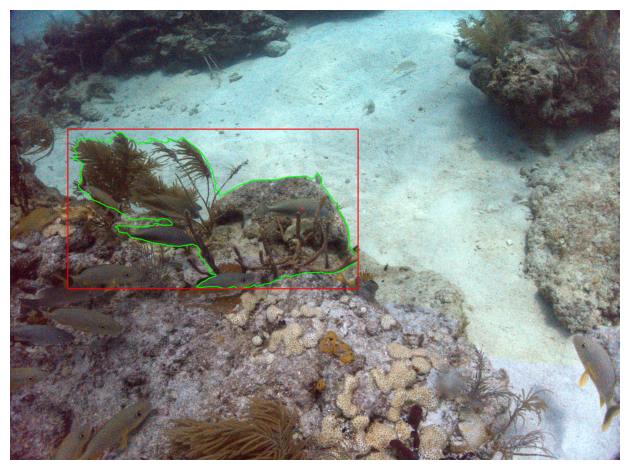

Polygon 1:
Area: 1081882.5
Centroid: (-989.7064696643736, -554.077243908958)
Width x Height: 1872 x 1046


In [ ]:
image_path = "P8010068UIE.png"
model_path = "model.ts"

image = middleCrop(image_path, 1)
# image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)

# Bounding box for segmentation context
bbox = (380, 798, 2290, 1868)
x_min, y_min, x_max, y_max = bbox
image_cropped = image_rgb[y_min:y_max, x_min:x_max]

segmenter = Inference(model_path=model_path, image_size=416, threshold=0.5)

results = segmenter.predict(image_cropped)

# Draw polygon on a copy of the image
image_with_poly = image_rgb.copy()
for result in results:
    result.draw_polygon(image_with_poly, thickness=5, x_offset=x_min, y_offset=y_min)

cv2.rectangle(image_with_poly, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=5)

plt.imshow(image_with_poly, aspect='auto')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print polygon properties
for i, result in enumerate(results):
    print(f"Polygon {i+1}:")
    print("Area:", result.get_area())
    print("Centroid:", result.get_centroid())
    print("Width x Height:", result.width, "x", result.height)
